In [111]:
using CSV, DataFrames, DrWatson
include(srcdir("infograph.jl"))

filter_graph (generic function with 1 method)

In [2]:
readdir(datadir("2020-06-22", "analysis"))

3-element Vector{String}:
 "gcamp6s1sexp5scapforceppuncture"
 "gcamp6s1sexp5scappuncture1_t1"
 "gcamp6s1sexp5scappuncture6_t1"

In [155]:
dir = datadir("2020-06-22","analysis","gcamp6s1sexp5scapforceppuncture");
phase = 1;
phasedir = joinpath(dir, "phase_$phase");

In [156]:
image = load(joinpath(phasedir, "video.tif"));
com = CSV.File(joinpath(phasedir, "com_trimmed.csv")) |> DataFrame;

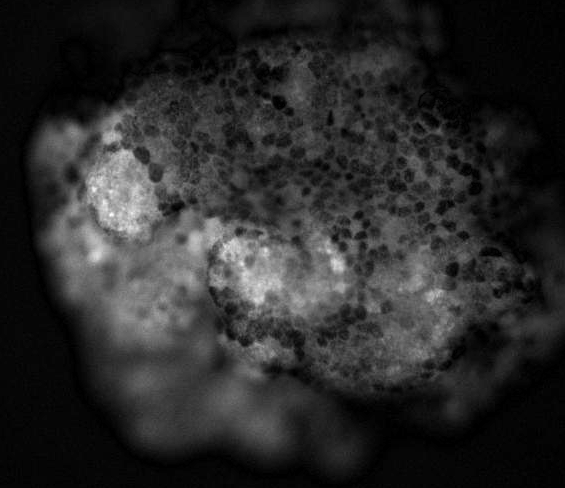

In [157]:
frame = adjust_histogram!(image[:,:,1], LinearStretching())

In [158]:
set_default_graphic_size(size(frame, 2)*1px, size(frame, 1)*1px)

In [159]:
filter(f -> isfile(joinpath(dir, f)), readdir(dir))

3-element Vector{String}:
 "ai_T1=33_T2=33.csv"
 "mi_T1=33_T2=33_minperm=100000_nn1=1_nn2=1.csv"
 "te_T1=33_T2=33_nn1=1_nn2=1_tenperm=10000.csv"

In [160]:
T1, T2, nn1, nn2, tenperm = 33, 33, 1, 1, 10000;

In [161]:
te = CSV.File(joinpath(dir, savename("te", (@dict T1 T2 nn1 nn2 tenperm), "csv"))) |> DataFrame;

In [190]:
nette = let df = leftjoin(te, te, on=[:source => :target, :target => :source], makeunique=true)
    df = df[:, [:delay, :phase, :p, :source, :target, :source_x, :source_y, :target_x, :target_y, :value, :value_1]]
    df.value = df.value - df.value_1
    select!(df, Not(:value_1))
    filter!(r -> r.value > zero(r.value), df)
    df
end

,delay,phase,p,source,target,source_x,source_y,target_x,target_y
,Int64,Int64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,5,1,0.0665933,17,20,93.208,229.164,117.47,116.783
2,2,1,0.146785,17,22,93.208,229.164,112.296,148.328
3,6,1,0.112889,17,24,93.208,229.164,107.494,381.619
4,9,1,0.155084,17,25,93.208,229.164,115.34,394.546
5,8,1,0.284772,17,26,93.208,229.164,138.959,41.2407
6,10,1,0.00839916,17,29,93.208,229.164,126.483,298.797
7,3,1,0.0314969,17,33,93.208,229.164,163.507,39.2709
8,6,1,0.224978,17,36,93.208,229.164,157.789,261.294
9,10,1,0.226577,17,38,93.208,229.164,160.036,404.364


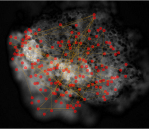

In [191]:
svg = let data = nette[(nette.delay .== 1) .& (nette.phase .== phase) .& (nette.p .< 0.05), :]
    compose(context(),
        # (context(), star(0.50, 0.83, 0.03, 5), fill("black")),
        info_graph(frame, com, data;
        node_size=0.008, node_α=0.5, edge_weight=0.2*data.value./maximum(data.value), edge_α=0.75, heads=false))
end

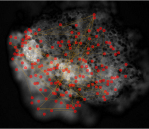

In [185]:
svg = let data = te[(te.delay .== 1) .& (te.phase .== phase) .& (te.p .< 0.05), :]
    compose(context(),
        # (context(), star(0.50, 0.83, 0.03, 5), fill("black")),
        info_graph(frame, com, data;
        node_size=0.008, node_α=0.5, edge_weight=0.2*data.value./maximum(data.value), edge_α=0.75, heads=false))
end

In [163]:
save("../before.svg", svg)
svg2png("../before.svg")

Background RRGGBBAA: ffffff00
Area 0:0:564.926:487.937 exported to 565 x 488 pixels (96 dpi)
Bitmap saved as: ../before.png


"../before.png"

In [126]:
let filename = savename("te-filtration", (@dict nn1 nn2 nperm))
    puncture = []
#     puncture = [(context(), star(0.52, 0.82, 0.02, 5), fill("black"))]
#     puncture = [(context(), star(0.41, 0.4, 0.02, 5), fill("black"))]
    puncture = [(context(), star(0.42, 0.37, 0.02, 5), fill("black"))]
    info = te[te.phase .== phase, :]
    filter_graph(phasedir, filename, frame, com, info, :delay;
        overlays=puncture, node_size=0.008, node_α=0.5, edge_weight=0.2, edge_α=0.75, remove=true)
end


Background RRGGBBAA: ffffff00
Area 0:0:563.943:657.902 exported to 564 x 658 pixels (96 dpi)
Bitmap saved as: /home/dgm/Documents/ASU/CalciumSignaling/Blackiston/BiobotPunctures/data/2020-06-22/analysis/gcamp6s1sexp5scapforceppuncture/phase_2/te-filtration_nn1=1_nn2=1_nperm=10000/001.png
Background RRGGBBAA: ffffff00
Area 0:0:563.943:657.902 exported to 564 x 658 pixels (96 dpi)
Bitmap saved as: /home/dgm/Documents/ASU/CalciumSignaling/Blackiston/BiobotPunctures/data/2020-06-22/analysis/gcamp6s1sexp5scapforceppuncture/phase_2/te-filtration_nn1=1_nn2=1_nperm=10000/002.png
Background RRGGBBAA: ffffff00
Area 0:0:563.943:657.902 exported to 564 x 658 pixels (96 dpi)
Bitmap saved as: /home/dgm/Documents/ASU/CalciumSignaling/Blackiston/BiobotPunctures/data/2020-06-22/analysis/gcamp6s1sexp5scapforceppuncture/phase_2/te-filtration_nn1=1_nn2=1_nperm=10000/003.png
Background RRGGBBAA: ffffff00
Area 0:0:563.943:657.902 exported to 564 x 658 pixels (96 dpi)
Bitmap saved as: /home/dgm/Documents/ASU

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib